In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score,accuracy_score,precision_score

In [4]:
dataset = pd.read_csv("creditcard.csv")

In [5]:
print("Any nulls in the dataset",dataset.isnull().values.any())

Any nulls in the dataset False


In [6]:
print('No. of unique labels',len(dataset['Class'].unique()))

No. of unique labels 2


In [7]:
print('label values', dataset.Class.unique())

label values [0 1]


In [8]:
print('Break down of Normal and Fraud Transactions')
print(pd.value_counts(dataset['Class'],sort=True))

Break down of Normal and Fraud Transactions
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Number of Observations')

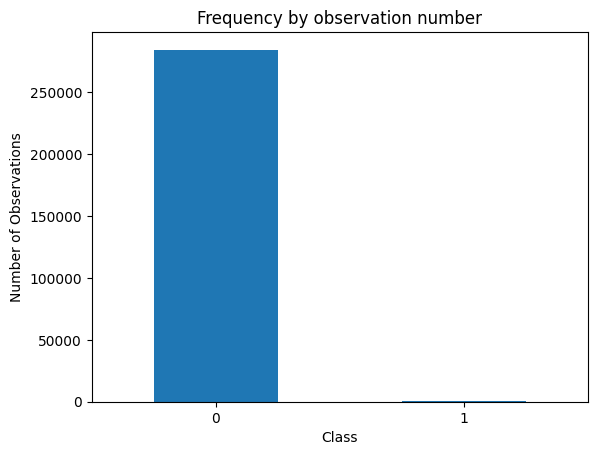

In [9]:
count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title('Frequency by observation number')
plt.xlabel('Class')
plt.ylabel('Number of Observations')

In [10]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

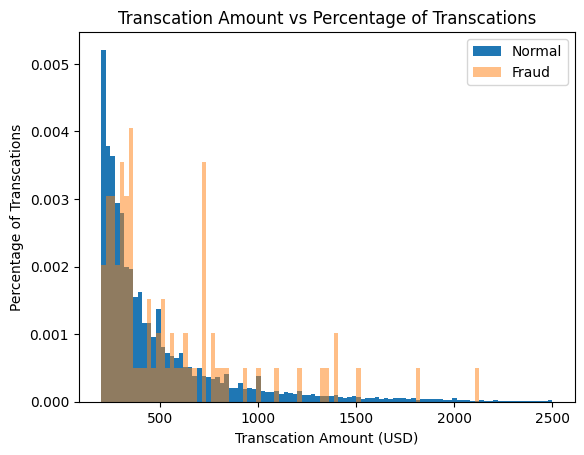

In [11]:
bins = np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title('Transcation Amount vs Percentage of Transcations')
plt.xlabel('Transcation Amount (USD)')
plt.ylabel('Percentage of Transcations')
plt.show()

In [12]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [13]:
raw_data = dataset.values

labels = raw_data[:,-1]
data = raw_data[:,0:-1]

In [14]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size =
0.2,random_state =2021)

In [16]:
nb_epoch = 10
batch_size = 64
input_dim = train_data.shape[1]
encoding_dim = 14
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = 4
learning_rate = 1e-7

In [17]:
input_layer = tf.keras.layers.Input(shape=(input_dim,))

In [18]:
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim,activation="tanh",activity_regularizer =
tf.keras.regularizers.l2(learning_rate))(input_layer)

encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

In [19]:
#Decoder
decoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

In [20]:
#Autoencoder
autoencoder = tf.keras.Model(inputs = input_layer,outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [21]:
autoencoder.compile(metrics=['accuracy'],loss= 'mean_squared_error',optimizer='adam')

history = autoencoder.fit(train_data,train_data,epochs = nb_epoch,
batch_size = batch_size,shuffle = True,
validation_data = (test_data,test_data),
verbose=1).history

Epoch 1/10
3561/3561 [==============================] - 19s 4ms/step - loss: 0.9204 - accuracy: 0.3475 - val_loss: 0.8492 - val_accuracy: 0.3832
Epoch 2/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.8798 - accuracy: 0.3642 - val_loss: 0.8311 - val_accuracy: 0.3771
Epoch 3/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.8667 - accuracy: 0.3581 - val_loss: 0.8178 - val_accuracy: 0.3750
Epoch 4/10
3561/3561 [==============================] - 17s 5ms/step - loss: 0.8558 - accuracy: 0.3533 - val_loss: 0.8068 - val_accuracy: 0.3719
Epoch 5/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.8465 - accuracy: 0.3568 - val_loss: 0.8017 - val_accuracy: 0.3793
Epoch 6/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.8397 - accuracy: 0.3709 - val_loss: 0.8010 - val_accuracy: 0.3941
Epoch 7/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.8342 - accuracy: 0.3832 - val_loss: 0.7970 - val_ac

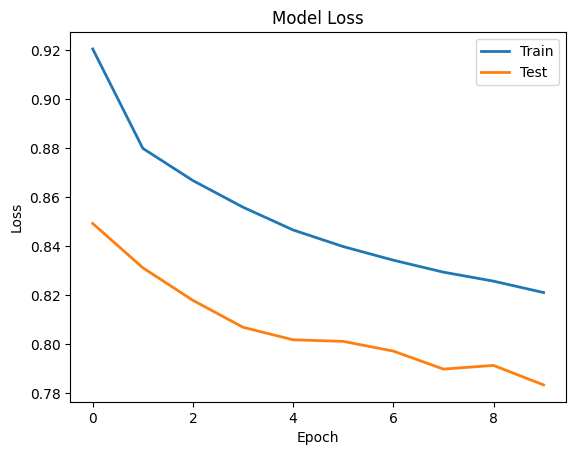

In [22]:
plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

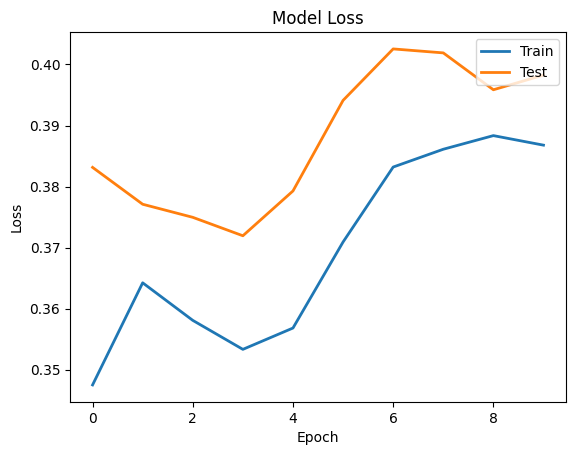

In [24]:
plt.plot(history['accuracy'],linewidth = 2,label = 'Train')
plt.plot(history['val_accuracy'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()